# Low-Risk-Aircraft-Proposal
 by Linda Temoet
## Proposal To Find The Best Low-Risk Aircraft For The Company's New Aviation Division

### 1. Introduction
I was tasked with preparing a proposal to determine which aircraft are the lowest risk for the company to start a new aviation line. 
I obtained a dataset from the Kaggle that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
I decided to filter the data and use data from 2000 to 2023, since it is more current and aircraft technology has evolved from 1962 till then.
### 1.1 Objectives
These are the objectives i hope to achieve with this analysis:

main objective: 
- To do risk analysis and determine the lowest risk aircraft

Other objectives:
1. To calculate the accident rates for different types of aircraft engines.
2. To evaluate the severity of accident injuries for different aircraft types.
3. To calculate the numbers of uninjured passangers of the different aircrafts types.

### 2. Data 
The data was analysed by Python pandas run on a jupyter notebook.
There were 4 main processes done for the data:
1. Data filtering (done on python pandas) where the data was filtered and the unnecessary sections were removed.
2. Data cleaning (done on python pandas) where the data was cleaned and then organised so that all the values for analysis were obtained.
3. Data analysis (done on python pandas) was done which I then obtained relevant data that answers all the objectives.
4. Data visulaization was done using matplotlib and tableau which was then presented to the relevant stakehoders.
The columns I remained with were 21 but I used only 8 to achieve the objectives I set out to do.
### 3. Reccommendation
I then made reccommendations of 3 aircraft models to the business stakeholders showing them the data I had obtained and visualizations.

In [1]:
#importing the relevant Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype='unicode')

In [3]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

The data has 30 columns and 88889 rows. We need data that is more up to data with the current technological advancements. Lets draw a time series graph to see changes over time. 
We start by changing the values of the variables to floats and date to datetime

In [4]:
#Changing event date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [5]:
#Tranforming the columns to integers
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], downcast='integer', errors='coerce')
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], downcast='integer', errors='coerce')
df['Total.Minor.Injuries'] = pd.to_numeric(df['Total.Minor.Injuries'], downcast='integer', errors='coerce')
df['Total.Uninjured'] = pd.to_numeric(df['Total.Uninjured'], downcast='integer', errors='coerce')

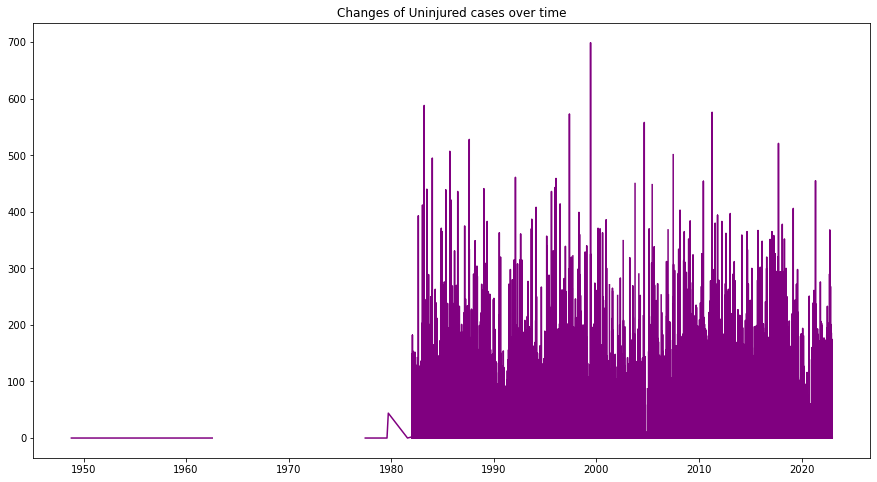

In [6]:
# changes of uninjured over time
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(df['Event.Date'],df['Total.Uninjured'],color='purple')
ax.set_title('Changes of Uninjured cases over time');

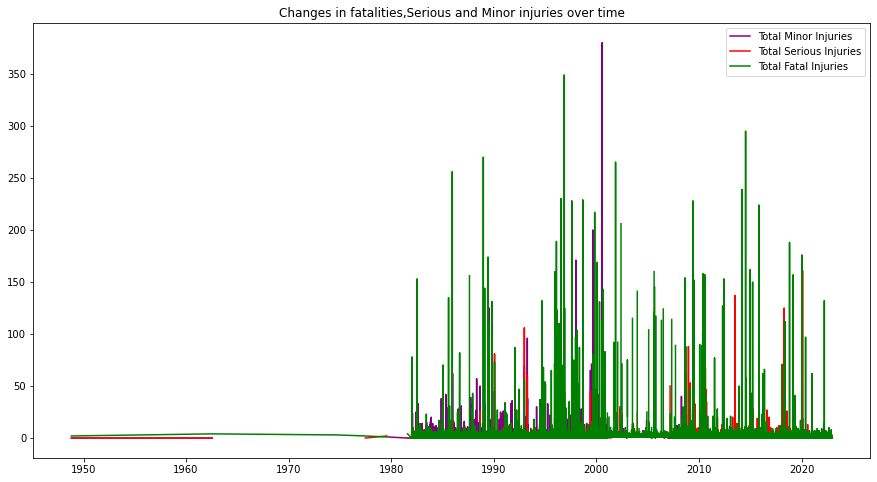

In [7]:
#changes of fatalities,serious injuries and minor injuries over time

fig,ax = plt.subplots(figsize=(15,8))
ax.plot(df['Event.Date'],df['Total.Minor.Injuries'],color='purple',label='Total Minor Injuries')
ax.plot(df['Event.Date'],df['Total.Serious.Injuries'],color='Red',label='Total Serious Injuries')
ax.plot(df['Event.Date'],df['Total.Fatal.Injuries'],color='green',label='Total Fatal Injuries')
ax.set_title('Changes in fatalities,Serious and Minor injuries over time')
ax.legend();

In [8]:
#filtering the dataset to have only data from 2000-2023
df1 = df.loc[(df['Event.Date'] > '01-01-2000')]

We will now proceed to inspect the columns

In [9]:
#inspection of the columns
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Many of the columns in the dataset are irrelevant to our objectives. we will filter them, to remain with the more relevant columns

In [10]:
#removal of the columns we wont need for analysis
df = df1.drop(['Latitude', 'Longitude', 'Airport.Code','Airport.Name','Air.carrier','Publication.Date',
               'Broad.phase.of.flight','FAR.Description','Schedule',],axis=1)

The main data we need for analysis remains, we can now check the information left in the dataframe

In [11]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
47677,20001212X20383,Accident,LAX00LA063,2000-01-02,"VICTORVILLE, CA",United States,Non-Fatal,Substantial,NaN,N3690L,...,No,1,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause
47678,20001212X20382,Accident,LAX00LA062,2000-01-02,"DOS PALOS, CA",United States,Non-Fatal,Substantial,NaN,N7249T,...,No,1,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,Probable Cause
47679,20001212X20364,Accident,FTW00LA067,2000-01-02,"CORNING, AR",United States,Non-Fatal,Substantial,NaN,N87NF,...,No,1,Turbo Prop,Personal,0.0,0.0,0.0,5.0,VMC,Probable Cause
47680,20001212X20358,Accident,FTW00LA057,2000-01-02,"ODESSA, TX",United States,Non-Fatal,Substantial,NaN,N4389W,...,No,1,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause
47681,20001212X20344,Accident,DEN00FA037,2000-01-02,"TELLURIDE, CO",United States,Fatal(1),Destroyed,NaN,N421CF,...,No,2,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,No,1,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


We can now go ahead and look at the individual columns. We start by checking the value counts of the Investigation type column

In [12]:
df['Investigation.Type'].value_counts()

Accident    38914
Incident     2298
Name: Investigation.Type, dtype: int64

we are not using results for incedents, just for accidents, we can go ahead to remove the incidents.

In [13]:
#Removing rows containing incidents
df = df[df['Investigation.Type'] != 'Incident']

We can now start on data cleaning. We start by checking all the values then quantifying the null values.

In [14]:
#checking for null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      9
Country                      14
Injury.Severity             327
Aircraft.damage             884
Aircraft.Category         12088
Registration.Number         828
Make                         28
Model                        36
Amateur.Built                56
Number.of.Engines          3844
Engine.Type                5828
Purpose.of.flight          4242
Total.Fatal.Injuries      10517
Total.Serious.Injuries    11526
Total.Minor.Injuries      10966
Total.Uninjured            5526
Weather.Condition          3113
Report.Status              5236
dtype: int64

In [15]:
#remove the null rows in make, we need these values for analysis, the null values are few so we can drop them
df = df.dropna(subset=['Make'])

In [16]:
#remove the null rows in the Injury severity column
df = df.dropna(subset=['Injury.Severity'])

Lets look at the Aircraft.category column and remove aircrafts that are not airplanes or helicopters

In [17]:
df['Aircraft.Category'].value_counts()

Airplane             22450
Helicopter            2970
Glider                 455
Balloon                199
Weight-Shift           161
Gyrocraft              158
Powered Parachute       91
Ultralight              29
WSFT                     9
Unknown                  9
Blimp                    4
Powered-Lift             3
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [18]:
df = df[(df['Aircraft.Category'] == 'Airplane') | (df['Aircraft.Category'] == 'Helicopter' )]

We will now look at the numeric columns and fill the missing values to aid in analysis

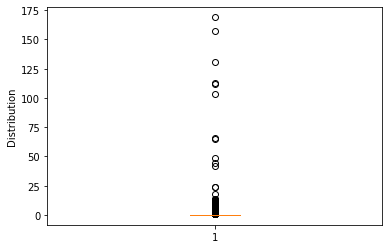

In [42]:
#looking at the distribution of the numeric columns
fatal_injuries = df['Total.Fatal.Injuries']
fig,ax = plt.subplots()
ax.boxplot(fatal_injuries)
ax.set_ylabel('Distribution');

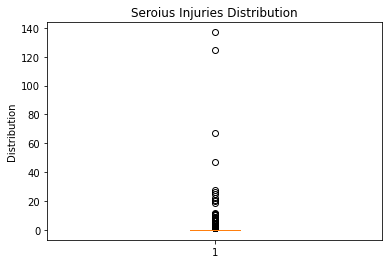

In [43]:
#looking at the distribution of the numeric columns
Serious_injuries = df['Total.Serious.Injuries']
fig,ax = plt.subplots()
ax.boxplot(Serious_injuries)
ax.set_title('Seroius Injuries Distribution')
ax.set_ylabel('Distribution');

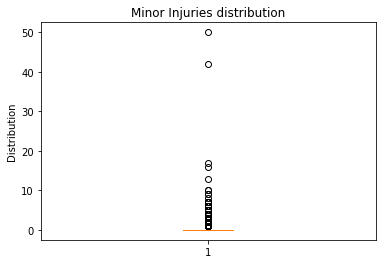

In [44]:
#looking at the distribution of the numeric columns
minor_injuries = df['Total.Minor.Injuries']
fig,ax = plt.subplots()
ax.boxplot(minor_injuries)
ax.set_title('Minor Injuries distribution')
ax.set_ylabel('Distribution');

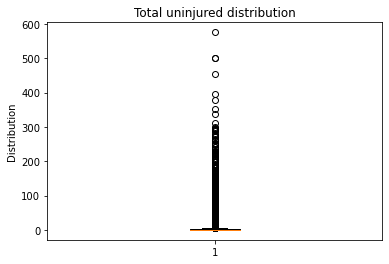

In [45]:
#looking at the distribution of the numeric columns
uninjured = df['Total.Uninjured']
fig,ax = plt.subplots()
ax.boxplot(uninjured)
ax.set_title('Total uninjured distribution')
ax.set_ylabel('Distribution');

In [23]:
#filling the null values in the numeric columns; using median because data is skewed
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median())
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median())
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median())
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].median())

Let us look at the dataframe again then going into the individual columns, as per the objectives.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25420 entries, 47743 to 88886
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                25420 non-null  object        
 1   Investigation.Type      25420 non-null  object        
 2   Accident.Number         25420 non-null  object        
 3   Event.Date              25420 non-null  datetime64[ns]
 4   Location                25420 non-null  object        
 5   Country                 25419 non-null  object        
 6   Injury.Severity         25420 non-null  object        
 7   Aircraft.damage         24995 non-null  object        
 8   Aircraft.Category       25420 non-null  object        
 9   Registration.Number     25274 non-null  object        
 10  Make                    25420 non-null  object        
 11  Model                   25409 non-null  object        
 12  Amateur.Built           25413 non-null  ob

In [25]:
#cleaning the make column
df['Make'] = df['Make'].str.lower()

In [26]:
#exporting to CSV
df.to_csv('Aviation_data_cleaned.csv')

We can now begin data analysis. We begin by analysing the engine types and how they affect injury severity.

In [27]:
#checking for null values
df['Engine.Type'].isna().sum()
df = df.dropna(subset=['Engine.Type'])#dropping the null values

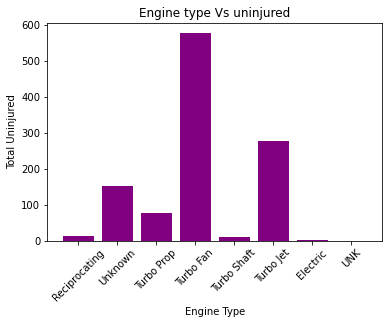

In [28]:
#creating a graph of engine type vs uninjured
uninjured = df['Total.Uninjured']

fig,ax = plt.subplots()
ax.bar(x=df['Engine.Type'],height=uninjured, color='purple')
ax.set_title('Engine type Vs uninjured')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Uninjured')
ax.tick_params(axis = 'x' , labelrotation = 45);

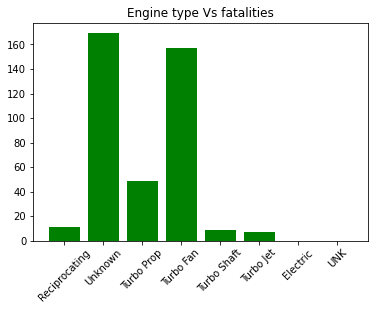

In [29]:
#creating a graph of engine type Vs total fatalities

fig,ax = plt.subplots()


ax.bar(x=df['Engine.Type'],height=df['Total.Fatal.Injuries'], color='green')
ax.set_title('Engine type Vs fatalities')
ax.tick_params(axis = 'x' , labelrotation = 45);

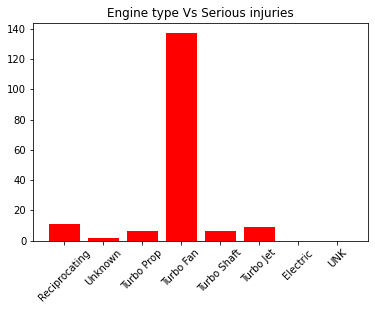

In [30]:
#creating a graph of engine type Vs total Serious injuries
fig,ax = plt.subplots()
ax.bar(x=df['Engine.Type'],height=df['Total.Serious.Injuries'], color='red')
ax.set_title('Engine type Vs Serious injuries')
ax.tick_params(axis='x', labelrotation = 45);

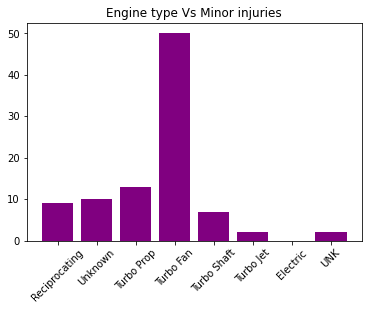

In [31]:
#creating a graph of engine type Vs total Minor injuries
fig,ax = plt.subplots()

ax.bar(x=df['Engine.Type'],height=df['Total.Minor.Injuries'], color='purple')
ax.set_title('Engine type Vs Minor injuries')
ax.tick_params(axis = 'x' , labelrotation = 45);

According to the graphs, we note that the Turbo fan engine type has the most number of uninjured and not the highest number of fatalities. We can go ahead and filter the data by this engine type.

In [32]:
filtered_df = df[df['Engine.Type'] == 'Turbo Fan']

The airplanes have been filtered by the engine type to only Turbo fan. We now filter the make column to show only the make of airplanes with value counts greater than 3

In [33]:
make_value_counts = filtered_df['Make'].value_counts()
df2 = filtered_df[filtered_df['Make'].isin(make_value_counts[make_value_counts > 3].index)]

In [34]:
df2['Make'].value_counts()

boeing                           150
cessna                            78
airbus                            48
embraer                           40
mcdonnell douglas                 22
bombardier inc                    20
airbus industrie                  14
learjet                           14
bombardier                        13
aero vodochody                     7
gulfstream aerospace               7
israel aircraft industries         7
gulfstream                         7
gates learjet corp.                7
learjet inc                        6
canadair                           6
bombardier, inc.                   5
beech                              5
embraer-empresa brasileira de      5
gates lear jet                     4
raytheon                           4
embraer s a                        4
mcdonnell douglas aircraft co      4
raytheon aircraft company          4
Name: Make, dtype: int64

The make column names are similar companies but different names. We can go ahead and change the makes to represent one company per make

In [35]:
make_dict = {'airbus industrie': 'airbus',
             'bombardier inc' : 'bombardier',
             'gates learjet corp':'learjet',
             'learjet inc':'learjet',
             'gulfstream aerospace' :'gulfstream',
             'bombardier, inc.':'bombardier',
             'mcdonnell douglas aircraft co': 'mcdonnell douglas',
             'gates lear jet':'learjet', 
             'raytheon aircraft company': 'raytheon',
             'embraer-empresa brasileira de' : 'embraer',
             'embraer s a' : 'embraer' }
df2['Make'] = df2['Make'].replace(to_replace = make_dict)
df2['Make'].value_counts()

<ipython-input-35-6dcb916ebdfb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Make'] = df2['Make'].replace(to_replace = make_dict)


boeing                        150
cessna                         78
airbus                         62
embraer                        49
bombardier                     38
mcdonnell douglas              26
learjet                        24
gulfstream                     14
raytheon                        8
gates learjet corp.             7
israel aircraft industries      7
aero vodochody                  7
canadair                        6
beech                           5
Name: Make, dtype: int64

We can now move to the objective 2: calculating the airplane types vs Injury severity

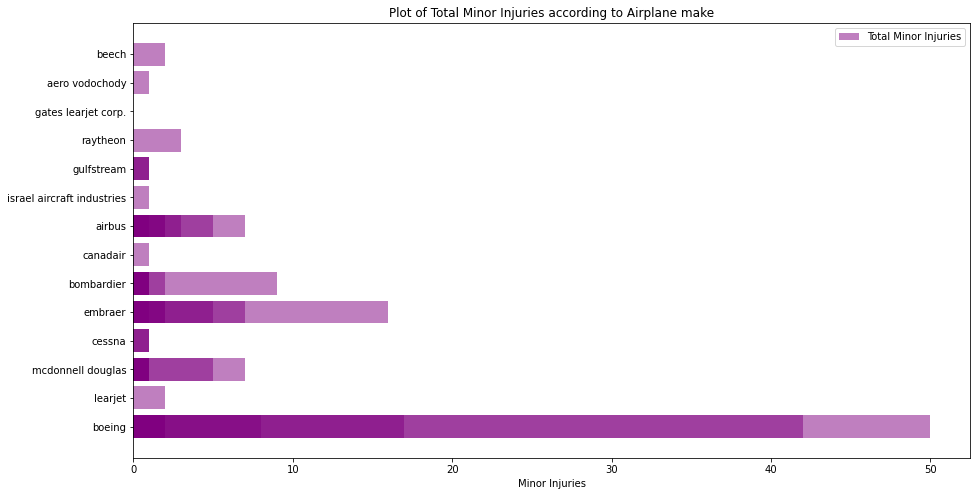

In [36]:
#plotting a visualization of airplane make Vs injuries
fig,ax = plt.subplots(figsize=(15,8))
ax.barh(y=df2['Make'],
        width=df2['Total.Minor.Injuries'],
        color='purple',
        label='Total Minor Injuries',
        alpha=0.5)
ax.set_title('Plot of Total Minor Injuries according to Airplane make')
ax.set_xlabel('Minor Injuries')
ax.legend();

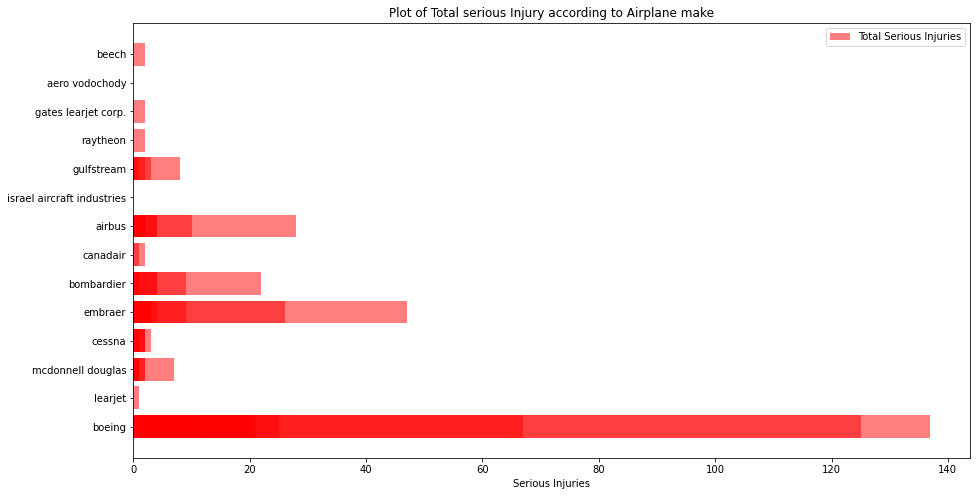

In [37]:
#plotting a visualization of airplane make Vs injuries
fig,ax = plt.subplots(figsize=(15,8))
ax.barh(y=df2['Make'],
        width=df2['Total.Serious.Injuries'],
        color='Red',
        label='Total Serious Injuries',
        alpha=0.5)
ax.set_title('Plot of Total serious Injury according to Airplane make')
ax.set_xlabel('Serious Injuries')
ax.legend();

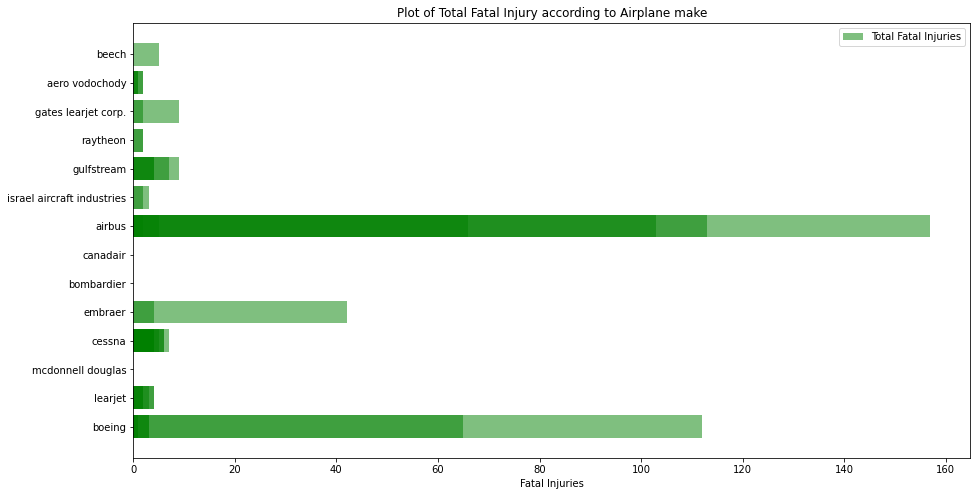

In [38]:
#plotting a visualization of airplane make Vs injuries
fig,ax = plt.subplots(figsize=(15,8))
ax.barh(y=df2['Make'],
        width=df2['Total.Fatal.Injuries'],
        color='green',
        label='Total Fatal Injuries',
        alpha=0.5)
ax.set_title('Plot of Total Fatal Injury according to Airplane make')
ax.set_xlabel('Fatal Injuries')
ax.legend();

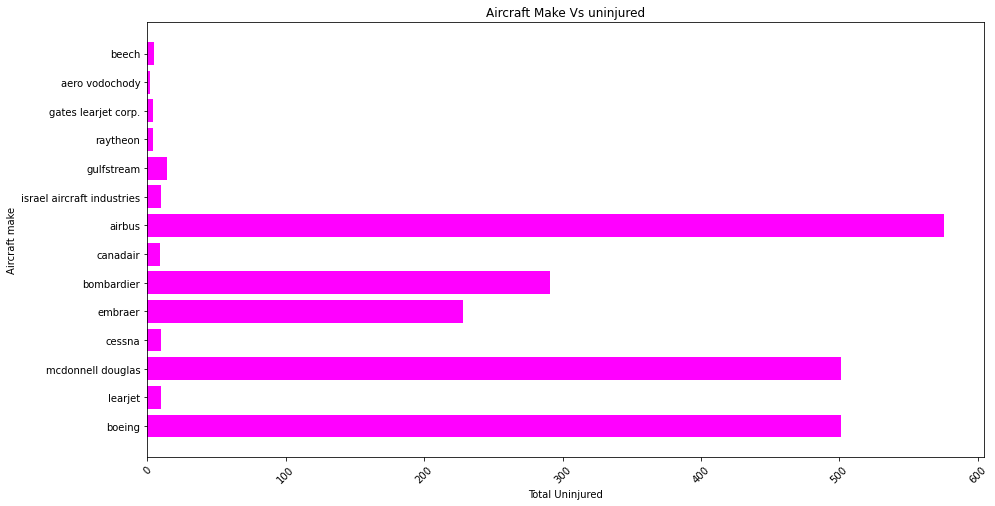

In [39]:
#plotting a visualization of airplane make Vs uninjured
uninjured = df2['Total.Uninjured']

fig,ax = plt.subplots(figsize=(15,8))
ax.barh(y=df2['Make'],width=uninjured, color='magenta')
ax.set_title('Aircraft Make Vs uninjured')
ax.set_ylabel('Aircraft make')
ax.set_xlabel('Total Uninjured')
ax.tick_params(axis = 'x' , labelrotation = 45);

In [40]:
#Looking at the dataframe again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 47942 to 88158
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                481 non-null    object        
 1   Investigation.Type      481 non-null    object        
 2   Accident.Number         481 non-null    object        
 3   Event.Date              481 non-null    datetime64[ns]
 4   Location                481 non-null    object        
 5   Country                 481 non-null    object        
 6   Injury.Severity         481 non-null    object        
 7   Aircraft.damage         328 non-null    object        
 8   Aircraft.Category       481 non-null    object        
 9   Registration.Number     480 non-null    object        
 10  Make                    481 non-null    object        
 11  Model                   480 non-null    object        
 12  Amateur.Built           480 non-null    obje

In [41]:
#exporting the dataframe to then do the Tableau Visualizations
import re

# Define a regex pattern for illegal characters (control characters that Excel doesn't allow)
illegal_chars = re.compile(r'[\x00-\x1F\x7F]')

# Function to clean a string by replacing illegal characters with a space (or any character you prefer)
def replace_illegal_chars(s, replacement=' '):
    if isinstance(s, str):
        return illegal_chars.sub(replacement, s)
    return s

# Apply this function to clean the entire DataFrame
df2_cleaned = df2.applymap(replace_illegal_chars)

# Now export the cleaned DataFrame to Excel
df2_cleaned.to_excel('Aviation_data_cleaned.xlsx')

### Reccomendations:
from the data we have done analysis for, here are the three reccomendations for the best aircraft types together with the reasons: 
1. Mc donnell douglas - Have many uninjured passangers, few injuries and few fatalities.
2. Bombardier - Have many uninjured passangers and few fatalities and injuries.
3. Embraer - Have many uninjured passangers and few fatalities and injuries.